## Logistic Regression/classification

We will be working on adult dataset of US census. Dataset can be obtained from 

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
The aim of this analysis is to find whether the salary is >$50K or <$50K

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

C:\Users\sagar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


dataset doesn't have a header. So, obtained the header from the description

In [2]:
colmn=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','salary']

In [94]:
adult=pd.read_csv('C:\\Users\\sagar\\Documents\\GitHub\\ML\\Classification_adult\\adult_train.txt',names=colmn,index_col=False)
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


removing the nulls. Waste of analysis

In [95]:
adult.replace(to_replace=' ?',value=np.NaN,inplace=True)
adult.dropna(subset=['workclass'],inplace=True)
adult.dropna(subset=['occupation'],inplace=True)
adult.dropna(subset=['native_country'],inplace=True)

In [5]:
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
salary            object
dtype: object

let's check the frequency of the column, i mean histogram/pie chart before going into further details

to ensure removing white space before the character data, we get the character columns and strip them off with any trailing or leading spaces

In [6]:
mylist = list(adult.select_dtypes(include=['object']).columns)
mylist

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'salary']

In [96]:
for i in mylist:
    adult[i]=adult[i].str.strip() #stripped the blank space. This helps in giving correct where conditions

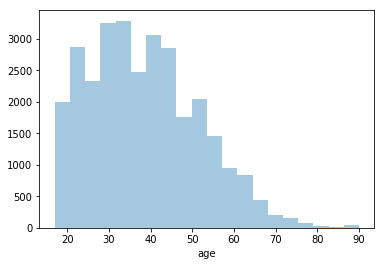

In [8]:
sns.distplot(adult['age'], bins=20, kde=False,rug=False)
plt.show()

inference: There are very less records from age 70 onwards. Can consider them as different set

## below functions are used to create categorical columns and use them for test dataset as well. so both train and test have same categorical columns and values

In [88]:
def catcreate(var,dataset): #create the function to set categorical columns for one column
        j=0
        h={}
        dataset[var +'_ind']=0
        k=var+'_dict'
        k={}
        uniq=list(dataset[var].unique())
        for i in uniq:
            dataset.loc[dataset[var] == i, var +'_ind'] = j
            k[i]=j
            h[i]=j
            j += 1
            
        return(h)
cat_dict={}
def assign_cat(dataset): #creating another function which calls the above function to loop over all the character columns
    mylist = list(dataset.select_dtypes(include=['object']).columns)
    for i in mylist:
        cat_dict[i]=catcreate(i,dataset)  

def for_test(dataset): #this function sets the categorical columns to test dataset provided they have
    #same column names. it uses the cat_dict dictionary created above.
    mylist = list(adult.select_dtypes(include=['object']).columns)
    for i in mylist:
        dataset[i +'_ind']=0
        if i in cat_dict.keys():
            data=cat_dict.get(i)#this gets the required variables assigned values
            j=list(dataset[i].unique())
            for k in j:
                if k in j:
                    cat=data.get(k)
                    dataset.loc[dataset[i] == k, i +'_ind'] = cat
                else:
                    dataset.loc[dataset[i] == k, i +'_ind'] = max(data.values)+1
                    data[k]=max(data.values)+1
        print(f'completed for {i}')

In [92]:
assign_cat(adult)
        

In [93]:
cat_dict#use this to check the dictionary of categorical columns and assigned values

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,salary,workclass_ind,education_ind,marital_status_ind,occupation_ind,relationship_ind,race_ind,sex_ind,native_country_ind,salary_ind
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,<=50K,0,0,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,<=50K,1,0,1,1,1,0,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,<=50K,2,1,2,2,0,0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,<=50K,2,2,1,2,1,1,0,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,<=50K,2,0,1,3,2,1,1,1,0


In [104]:
def cntplt(var,dataset,hue_var):
    fig, ax = plt.subplots(figsize=(12,5))
    ax = sns.countplot(x=var, data=dataset,hue=hue_var)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

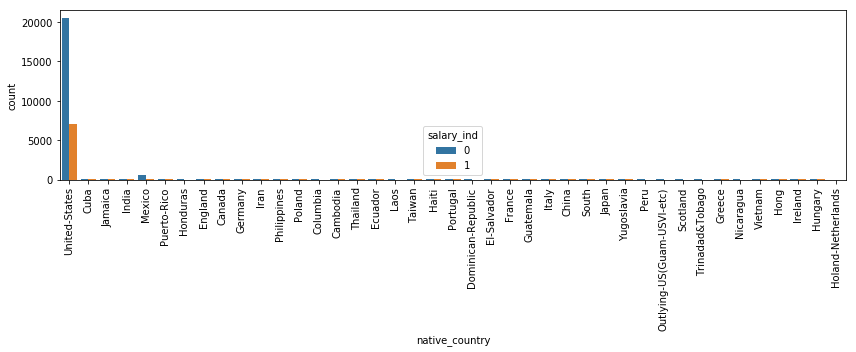

In [105]:
cntplt('native_country',adult,'salary_ind')

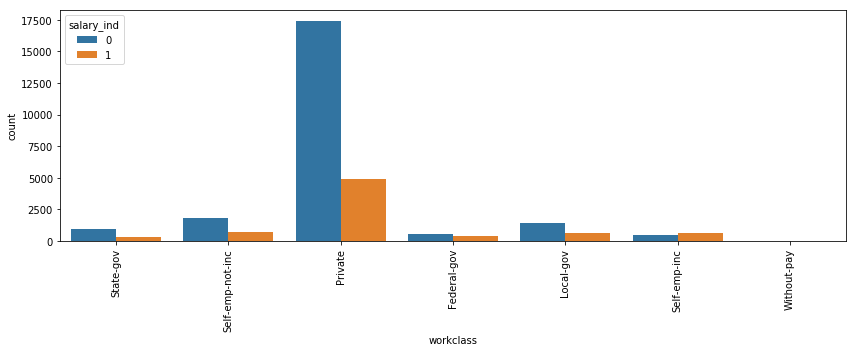

In [106]:
cntplt('workclass',adult,'salary_ind')

Removing the without pay category

In [107]:
adult_new = adult[adult.workclass != 'Without-pay']

In [175]:
adult_US=adult_new[adult_new['native_country']=='United-States']
print(adult_US.shape)
adult_other=adult_new[adult_new['native_country']!='United-States']
print(adult_other.shape)

(27491, 24)
(2657, 24)


In [181]:
adult_US.drop('index',axis=1,inplace=True)


C:\Users\sagar\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [182]:
adult_other.reset_index(inplace=True)
adult_other.drop('index',axis=1,inplace=True)

C:\Users\sagar\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


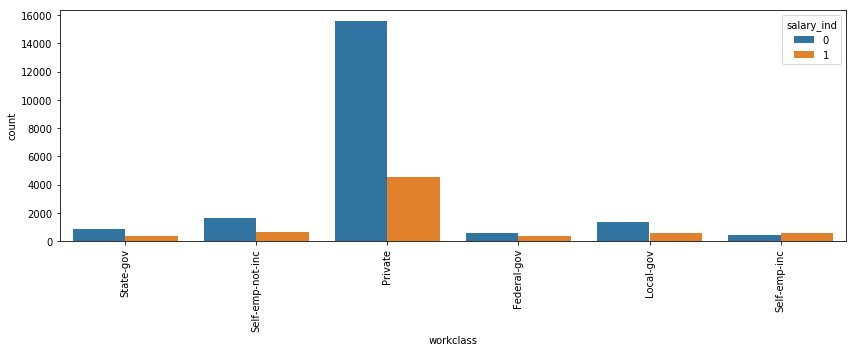

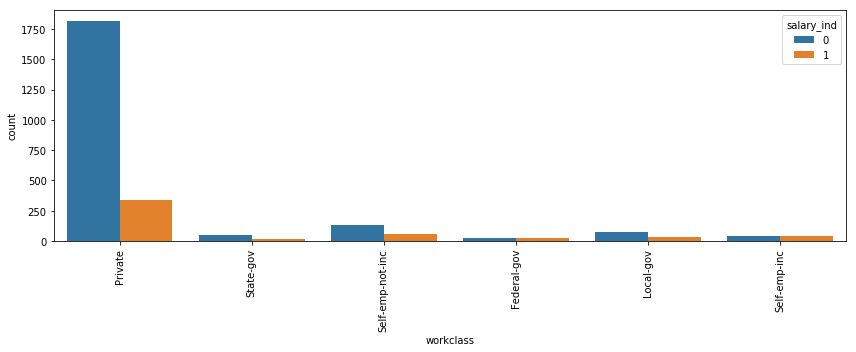

In [109]:
cntplt('workclass',adult_US,'salary_ind')
cntplt('workclass',adult_other,'salary_ind')

Inference: without pay and never worked doesn't or very minimal salaries. so they can be ignored for process 
    lets remove the without pay category all together they arent important

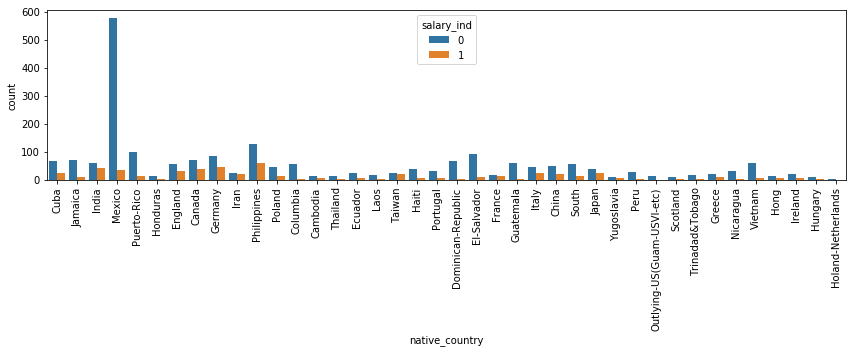

In [110]:
cntplt('native_country',adult_other,'salary_ind')

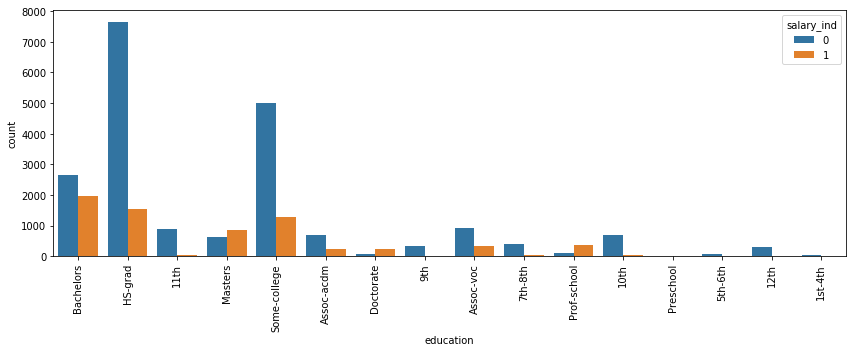

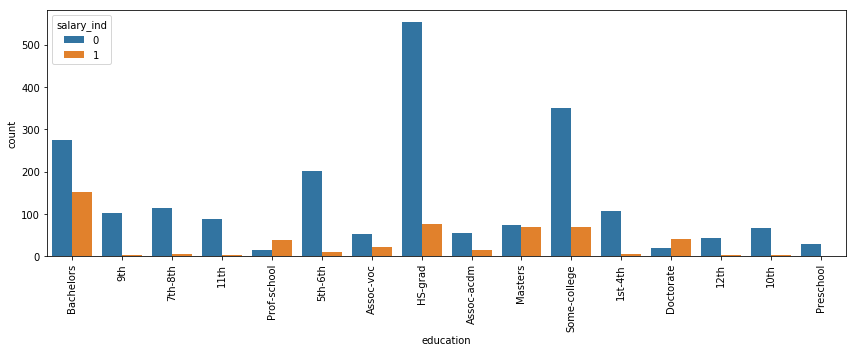

In [17]:
cntplt('education',adult_US,'salary_ind')
cntplt('education',adult_other,'salary_ind')

Inference: HS-Grad forms the major share, but bachelors, some-college also include good amount of populace, rest are small numbers

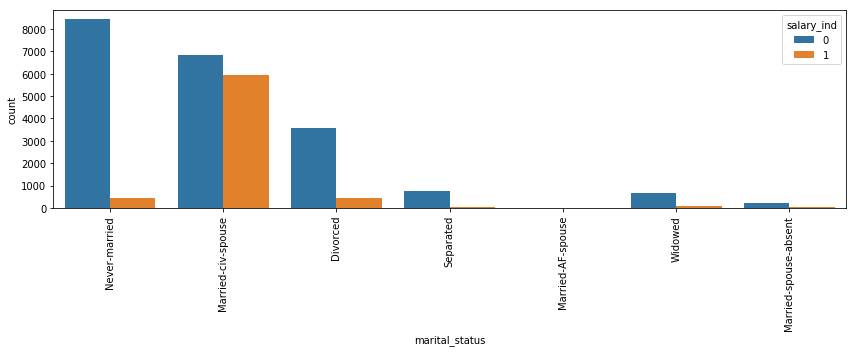

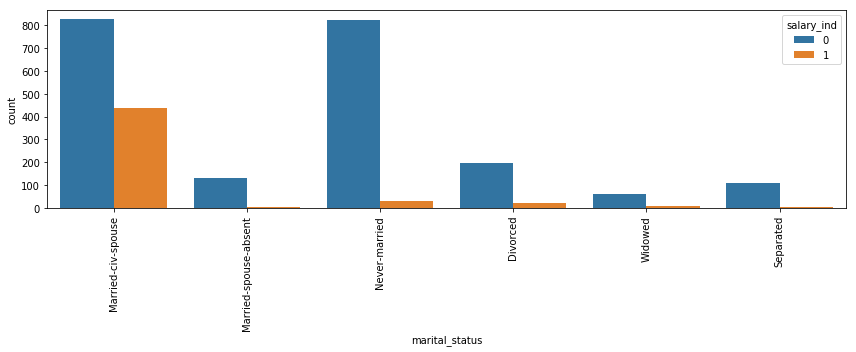

In [111]:
cntplt('marital_status',adult_US,'salary_ind')
cntplt('marital_status',adult_other,'salary_ind')

Let's change the categorical columns into numbers and see

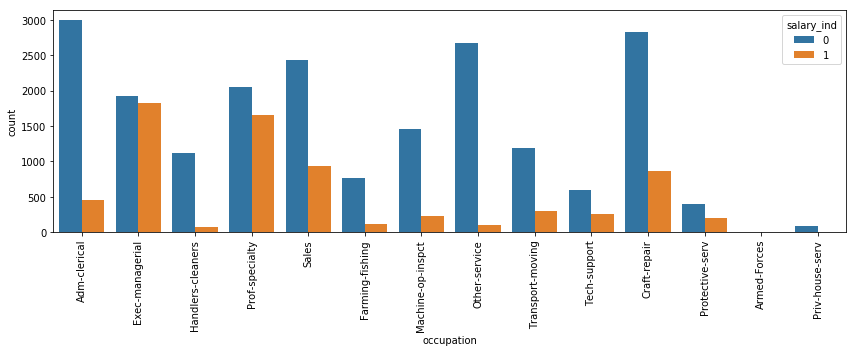

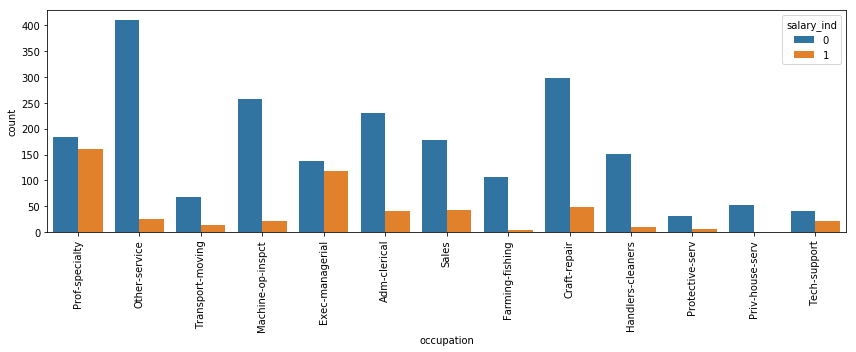

In [112]:
cntplt('occupation',adult_US,'salary_ind')
cntplt('occupation',adult_other,'salary_ind')

armed forces have less number of records/no higher salaries

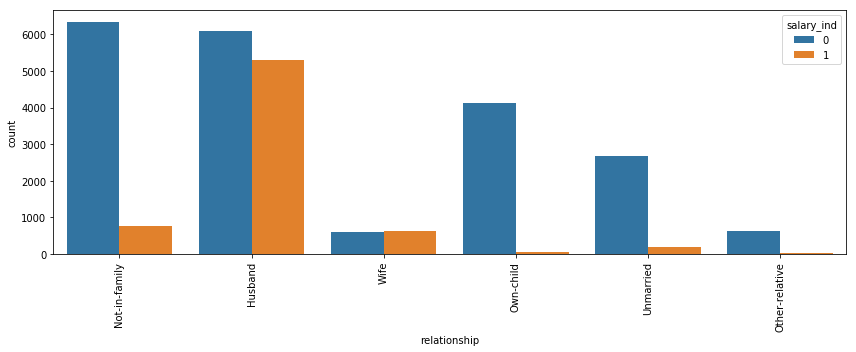

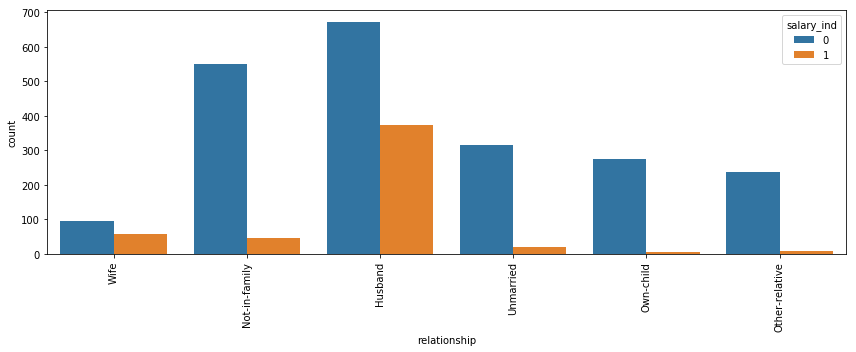

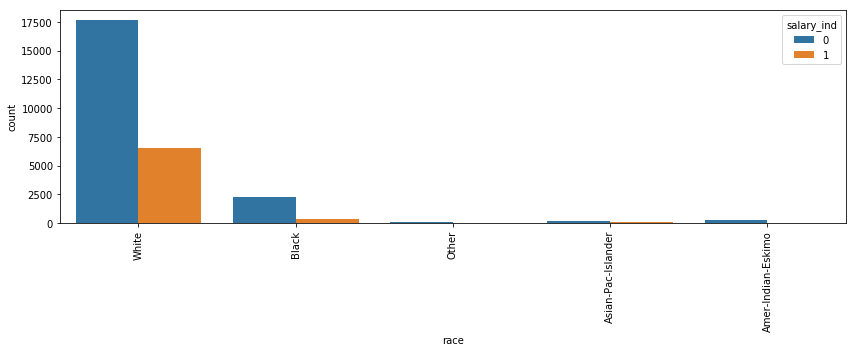

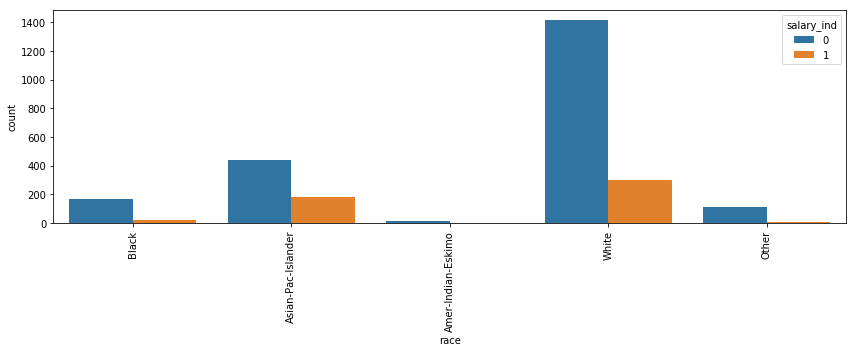

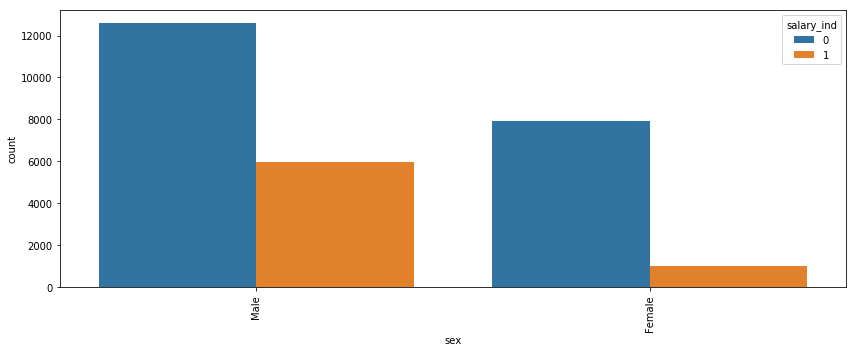

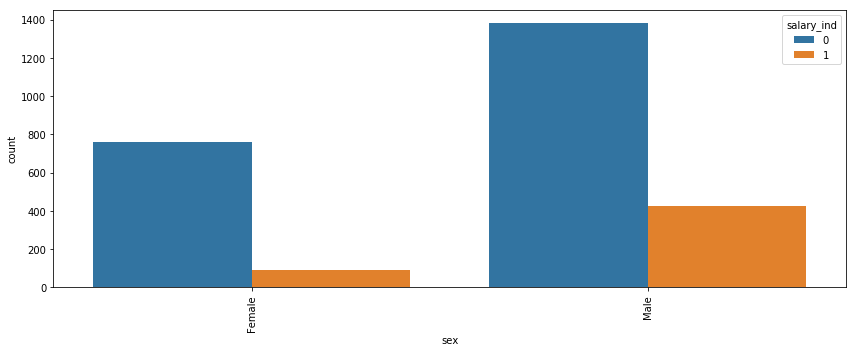

In [113]:
cntplt('relationship',adult_US,'salary_ind')
cntplt('relationship',adult_other,'salary_ind')
cntplt('race',adult_US,'salary_ind')
cntplt('race',adult_other,'salary_ind')
cntplt('sex',adult_US,'salary_ind')
cntplt('sex',adult_other,'salary_ind')

US has to be treated separately and rest all the countries have to be treated separately

Let's eliminate the non-numeric columns and create a new dataset to be used 

In [114]:
adult_US.dtypes

age                    int64
workclass             object
fnlwgt                 int64
education             object
education_num          int64
marital_status        object
occupation            object
relationship          object
race                  object
sex                   object
capital_gain           int64
capital_loss           int64
hours_per_week         int64
native_country        object
salary                object
workclass_ind          int64
education_ind          int64
marital_status_ind     int64
occupation_ind         int64
relationship_ind       int64
race_ind               int64
sex_ind                int64
native_country_ind     int64
salary_ind             int64
dtype: object

filter only int datatypes using the below code

In [188]:
adult_US_num=adult_US[['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week','workclass_ind','education_ind','marital_status_ind','occupation_ind','relationship_ind','race_ind','sex_ind','salary_ind']]
#adult_other_num=adult_other.select_dtypes(include=['int8','int64'])
#'native_country_ind' intentionally removed this column as this is unnecessary and causes singular matrix error

In [198]:
adult_other_num=adult_other[['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week','workclass_ind','education_ind','marital_status_ind','occupation_ind','relationship_ind','race_ind','sex_ind','native_country_ind','salary_ind']]

In [192]:
adult_US_num_vars=list(adult_US_num.columns)
y='salary_ind'
X=[i for i in adult_US_num_vars if i!=y]
X_US_train=adult_US_num[X]
y_US_train=adult_US_num[y]

import statsmodels.api as sm
logit_model=sm.Logit(y_US_train,X_US_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.459768
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             salary_ind   No. Observations:                27491
Model:                          Logit   Df Residuals:                    27478
Method:                           MLE   Df Model:                           12
Date:                Tue, 11 Sep 2018   Pseudo R-squ.:                  0.1894
Time:                        00:24:41   Log-Likelihood:                -12639.
converged:                       True   LL-Null:                       -15592.
                                        LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
age                    0.0081      0.001      6.648      0.000       0.006       0.011
fnlwg

In [193]:
regression = LogisticRegression()
model = regression.fit(X_US_train,y_US_train)

In [197]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(model,X_US_train,y_US_train,cv=10)
accuracies.mean()

0.7866941935217411

In [199]:
adult_other_num_vars=list(adult_other_num.columns)
y='salary_ind'
X=[i for i in adult_other_num_vars if i!=y]
X_other_train=adult_other_num[X]
y_other_train=adult_other_num[y]

import statsmodels.api as sm
logit_model=sm.Logit(y_other_train,X_other_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.381048
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             salary_ind   No. Observations:                 2657
Model:                          Logit   Df Residuals:                     2643
Method:                           MLE   Df Model:                           13
Date:                Tue, 11 Sep 2018   Pseudo R-squ.:                  0.2234
Time:                        00:36:18   Log-Likelihood:                -1012.4
converged:                       True   LL-Null:                       -1303.7
                                        LLR p-value:                4.257e-116
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
age                    0.0055      0.005      1.208      0.227      -0.003       0.015
fnlwg

In [202]:
X_other_train.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_ind', 'education_ind',
       'marital_status_ind', 'occupation_ind', 'relationship_ind', 'race_ind',
       'sex_ind', 'native_country_ind'],
      dtype='object')

In [203]:
X_other_train.drop(['marital_status_ind'],axis=1,inplace=True)

C:\Users\sagar\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [200]:
regression = LogisticRegression()
model = regression.fit(X_other_train,y_other_train)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(model,X_other_train,y_other_train,cv=10)
accuracies.mean()

0.8325307969946065

In [204]:
import statsmodels.api as sm
logit_model=sm.Logit(y_other_train,X_other_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.381053
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             salary_ind   No. Observations:                 2657
Model:                          Logit   Df Residuals:                     2644
Method:                           MLE   Df Model:                           12
Date:                Tue, 11 Sep 2018   Pseudo R-squ.:                  0.2234
Time:                        00:40:22   Log-Likelihood:                -1012.5
converged:                       True   LL-Null:                       -1303.7
                                        LLR p-value:                6.048e-117
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
age                    0.0058      0.004      1.389      0.165      -0.002       0.014
fnlwg

In [205]:
X_other_train.drop(['workclass_ind'],axis=1,inplace=True)

C:\Users\sagar\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [206]:
import statsmodels.api as sm
logit_model=sm.Logit(y_other_train,X_other_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.381163
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             salary_ind   No. Observations:                 2657
Model:                          Logit   Df Residuals:                     2645
Method:                           MLE   Df Model:                           11
Date:                Tue, 11 Sep 2018   Pseudo R-squ.:                  0.2231
Time:                        00:41:13   Log-Likelihood:                -1012.8
converged:                       True   LL-Null:                       -1303.7
                                        LLR p-value:                1.083e-117
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
age                    0.0053      0.004      1.272      0.204      -0.003       0.013
fnlwg

In [207]:
X_other_train.drop(['hours_per_week'],axis=1,inplace=True)
X_other_train.drop(['age'],axis=1,inplace=True)

C:\Users\sagar\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [208]:
import statsmodels.api as sm
logit_model=sm.Logit(y_other_train,X_other_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.381575
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             salary_ind   No. Observations:                 2657
Model:                          Logit   Df Residuals:                     2647
Method:                           MLE   Df Model:                            9
Date:                Tue, 11 Sep 2018   Pseudo R-squ.:                  0.2223
Time:                        00:42:12   Log-Likelihood:                -1013.8
converged:                       True   LL-Null:                       -1303.7
                                        LLR p-value:                4.923e-119
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
fnlwgt              -4.12e-06   5.36e-07     -7.692      0.000   -5.17e-06   -3.07e-06
educa

In [209]:
regression = LogisticRegression()
model = regression.fit(X_other_train,y_other_train)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(model,X_other_train,y_other_train,cv=10)
accuracies.mean()

0.8340303217233245